In [1]:

# CHAPTER 2 -  Visualization with hierarchical clustering and t-SNE

# Import necessary modules
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer,normalize,LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.manifold import TSNE




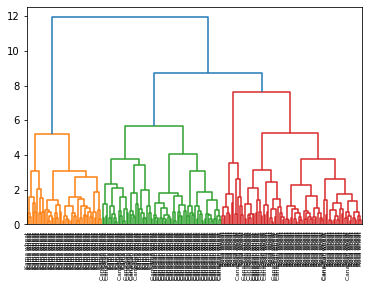

In [2]:
#Hierarchical clustering of the grain data

grain_df = pd.read_csv('Dados/Grains/seeds.csv', sep=',')
grain_df['varieties'] = grain_df['varieties'].replace([1,2,3],["Canadian wheat","Kama wheat", "Rosa wheat"])
# Create arrays for the features and the response variable
varieties_grain = grain_df['varieties'].values
samples_grain = grain_df.drop('varieties', axis=1).values

# Calculate the linkage: mergings
mergings_grain = linkage(samples_grain,method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings_grain,
            labels=varieties_grain,
            leaf_rotation=90,
            leaf_font_size=6,
)
plt.show()



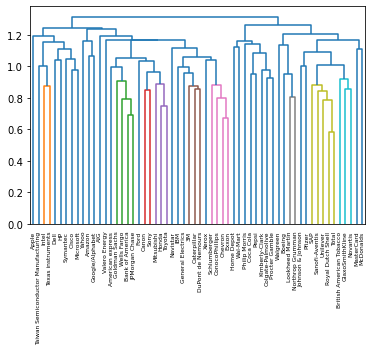

In [3]:

#Hierarchies of stocks

stocks_df = pd.read_csv('Dados/company-stock-movements-2010-2015-incl.csv', sep=',')
# Create arrays for the features and the response variable
stock_companies = stocks_df['company'].values
stock_movements = stocks_df.drop('company', axis=1).values

# Normalize the movements: normalized_movements
normalized_movements = normalize(stock_movements)

# Calculate the linkage: mergings
mergings_stocks = linkage(normalized_movements,method='complete')

# Plot the dendrogram
dendrogram(mergings_stocks, labels=stock_companies, leaf_rotation=90, leaf_font_size=6)
plt.show()




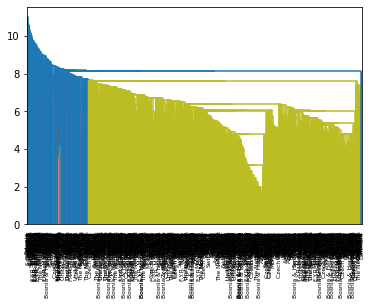

In [4]:
#Different linkage, different hierarchical clustering!

eurovision_df = pd.read_csv('Dados/eurovision-2016.csv', sep=',')
# Create arrays for the features and the response variable
country_names = eurovision_df['From country'].values
samples_eurovision = eurovision_df.drop(['From country', 'To country', 'Jury Points', 'Televote Points'], axis=1).values

# Calculate the linkage: mergings
mergings_eurovision = linkage(samples_eurovision, method='single')

# Plot the dendrogram
dendrogram(mergings_eurovision, labels=country_names, leaf_rotation=90, leaf_font_size=6)
plt.show()



In [5]:

#Extracting the cluster labels Grains

# Use fcluster to extract labels: labels
labels_grain = fcluster(mergings_grain, 6, criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df_label_grain = pd.DataFrame({'labels': labels_grain, 'varieties': varieties_grain})

# Create crosstab: ct
ct = pd.crosstab(df_label_grain['labels'], df_label_grain['varieties'])

# Display ct
print(ct)



varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0          47           0
2                      52          23           0
3                       1           0          13
4                      17           0          57


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


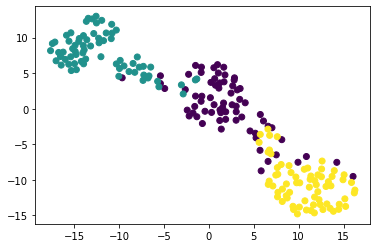

In [6]:

#Extracting the cluster labels

# Create a TSNE instance: model
model_grain = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features_grain = model_grain.fit_transform(samples_grain)

# Select the 0th feature: xs
xs = tsne_features_grain[:,0]

# Select the 1st feature: ys
ys = tsne_features_grain[:,1]

# Scatter plot, coloring by variety_numbers
label_encoder = LabelEncoder()
labels_grain = label_encoder.fit_transform(df_label_grain['varieties'])
plt.scatter(xs, ys, c=labels_grain)
plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


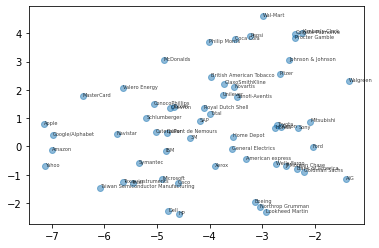

In [7]:

# #A t-SNE map of the stock market

# Create a TSNE instance: model
model_stock = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features_stock = model_stock.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features_stock[:,0]

# Select the 1th feature: ys
ys = tsne_features_stock[:,1]

# Scatter plot
plt.scatter(xs, ys, alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, stocks_df['company']):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()